In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints Mediapipe Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             #mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             #mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             #) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Cam Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

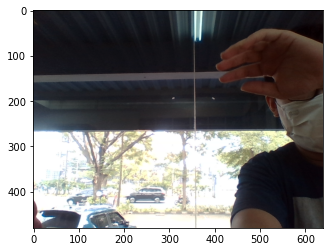

In [7]:
draw_styled_landmarks(frame, results) # apply landmarks
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # color conversion

# Ekstrak Hasil Keypoint


In [8]:
results.pose_landmarks

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
len(results.pose_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [12]:
extract_keypoints(results)

array([ 3.63287091e-01,  4.76914406e-01, -1.26591325e+00,  9.99697208e-01,
        3.92960757e-01,  3.87373328e-01, -1.19625938e+00,  9.99400198e-01,
        4.12692010e-01,  3.84033620e-01, -1.19641566e+00,  9.99547124e-01,
        4.31842804e-01,  3.81405801e-01, -1.19609249e+00,  9.99373019e-01,
        3.15558374e-01,  3.99257213e-01, -1.19296861e+00,  9.99320269e-01,
        2.87606359e-01,  4.03147906e-01, -1.19181931e+00,  9.99350250e-01,
        2.63197482e-01,  4.09643114e-01, -1.19217753e+00,  9.99080122e-01,
        4.64469284e-01,  4.24503773e-01, -6.92792058e-01,  9.99506652e-01,
        2.35997677e-01,  4.56134200e-01, -6.49415374e-01,  9.99575019e-01,
        4.08148587e-01,  5.66921890e-01, -1.07027698e+00,  9.99559224e-01,
        3.21857423e-01,  5.70697486e-01, -1.06174970e+00,  9.99624014e-01,
        6.63653553e-01,  8.04420710e-01, -4.15810108e-01,  9.97684002e-01,
        8.70729312e-02,  8.31673324e-01, -2.14999393e-01,  9.83753026e-01,
        8.92515361e-01,  

In [13]:
extract_keypoints(results).shape

(258,)

# Buat Folder Training

In [12]:
# Path for exported data, numpy arrays
data_path = os.path.join('Dataset') 

# Actions that we try to detect
actions = np.array(['No_Input','A','B','C',"D"])
# X videos worth of data
no_sequences = 30

# Videos are going to be X frames in length
sequence_length = 30

# Folder start
#start_folder = 30

In [68]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

#  Mengumpulkan Hasil Keypoint dari Gambar

In [69]:
cap = cv2.VideoCapture(0) #to access webcam device

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    #NEW LOOP
    for action in actions: # loop through actions
        for sequence in range(no_sequences): # loop through sequences/videos
            for frame_no in range(sequence_length): # loop through video length 

                # read frames
                ret, frame = cap.read()

                # make detections
                image, results = mediapipe_detection(frame, holistic)

                # draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW collection wait logic
                if frame_no == 0:
                    cv2.putText(image, 'COLLECTING NOW...', (120, 200), 
                                cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for Action: {} & Video: {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) # show image on screen
                    cv2.waitKey(100) # 0.15 seconds break
                else:
                    cv2.putText(image, 'Collecting frames for Action: {} & Video: {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) # show image on screen
                
                # NEW extract key-points
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path, action, str(sequence), str(frame_no))
                np.save(npy_path, keypoints)
                
                # break gracefully if hit 'q' on keyboard
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()           # release webcam
    cv2.destroyAllWindows() # close down all frames

# 6. Preprocess Data and Create Labels and Features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{'No_Input': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(data_path, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
np.array(sequences).shape

(150, 30, 258)

In [18]:
np.array(labels).shape

(150,)

In [21]:
X = np.array(sequences)

In [22]:
X.shape

(150, 30, 258)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [25]:
y_test.shape

(8, 5)

# 7. Build and Train LSTM Neural Network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [27]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [28]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [85]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 [==============================] - 9s 626ms/step - loss: 1.5225 - categorical_accuracy: 0.2295
Epoch 2/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.9987 - categorical_accuracy: 0.6167
Epoch 3/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.7455 - categorical_accuracy: 0.7014
Epoch 4/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.5851 - categorical_accuracy: 0.8687
Epoch 5/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.4658 - categorical_accuracy: 0.8472
Epoch 6/2000
5/5 [==============================] - 0s 39ms/step - loss: 0.3779 - categorical_accuracy: 0.8633
Epoch 7/2000
5/5 [==============================] - 0s 36ms/step - loss: 0.3734 - categorical_accuracy: 0.8298
Epoch 8/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.4779 - categorical_accuracy: 0.7590
Epoch 9/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.3542 - categorical_accuracy: 0.8081


5/5 [==============================] - 0s 34ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 146/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 147/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 148/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 149/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 150/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 151/2000
5/5 [==============================] - 0s 36ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 152/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 153/2000
5/5 [==============================] - 0s 36ms/step - loss: 0.0026 - categorical_accuracy: 1.000

5/5 [==============================] - 0s 32ms/step - loss: 9.1175e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
5/5 [==============================] - 0s 30ms/step - loss: 9.4906e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
5/5 [==============================] - 0s 31ms/step - loss: 9.5349e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
5/5 [==============================] - 0s 37ms/step - loss: 9.2950e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
5/5 [==============================] - 0s 34ms/step - loss: 9.1376e-04 - categorical_accuracy: 1.0000
Epoch 294/2000
5/5 [==============================] - 0s 32ms/step - loss: 9.3561e-04 - categorical_accuracy: 1.0000
Epoch 295/2000
5/5 [==============================] - 0s 31ms/step - loss: 9.0868e-04 - categorical_accuracy: 1.0000
Epoch 296/2000
5/5 [==============================] - 0s 31ms/step - loss: 9.1231e-04 - categorical_accuracy: 1.0000
Epoch 297/2000
5/5 [==============================] - 0s 31ms/step - loss: 8.56

5/5 [==============================] - 0s 34ms/step - loss: 5.0136e-04 - categorical_accuracy: 1.0000
Epoch 428/2000
5/5 [==============================] - 0s 34ms/step - loss: 4.6837e-04 - categorical_accuracy: 1.0000
Epoch 429/2000
5/5 [==============================] - 0s 37ms/step - loss: 4.7406e-04 - categorical_accuracy: 1.0000
Epoch 430/2000
5/5 [==============================] - 0s 37ms/step - loss: 4.8566e-04 - categorical_accuracy: 1.0000
Epoch 431/2000
5/5 [==============================] - 0s 34ms/step - loss: 4.5920e-04 - categorical_accuracy: 1.0000
Epoch 432/2000
5/5 [==============================] - 0s 31ms/step - loss: 4.6839e-04 - categorical_accuracy: 1.0000
Epoch 433/2000
5/5 [==============================] - 0s 41ms/step - loss: 4.8589e-04 - categorical_accuracy: 1.0000
Epoch 434/2000
5/5 [==============================] - 0s 34ms/step - loss: 4.7028e-04 - categorical_accuracy: 1.0000
Epoch 435/2000
5/5 [==============================] - 0s 35ms/step - loss: 4.62

5/5 [==============================] - 0s 32ms/step - loss: 2.7919e-04 - categorical_accuracy: 1.0000
Epoch 568/2000
5/5 [==============================] - 0s 31ms/step - loss: 2.7492e-04 - categorical_accuracy: 1.0000
Epoch 569/2000
5/5 [==============================] - 0s 34ms/step - loss: 2.7696e-04 - categorical_accuracy: 1.0000
Epoch 570/2000
5/5 [==============================] - 0s 40ms/step - loss: 2.8140e-04 - categorical_accuracy: 1.0000
Epoch 571/2000
5/5 [==============================] - 0s 34ms/step - loss: 2.7880e-04 - categorical_accuracy: 1.0000
Epoch 572/2000
5/5 [==============================] - 0s 32ms/step - loss: 2.7834e-04 - categorical_accuracy: 1.0000
Epoch 573/2000
5/5 [==============================] - 0s 32ms/step - loss: 2.8432e-04 - categorical_accuracy: 1.0000
Epoch 574/2000
5/5 [==============================] - 0s 32ms/step - loss: 2.6795e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
5/5 [==============================] - 0s 33ms/step - loss: 2.79

5/5 [==============================] - 0s 35ms/step - loss: 1.7992e-04 - categorical_accuracy: 1.0000 0s - loss: 1.8033e-04 - categorical_accuracy: 1.00
Epoch 707/2000
5/5 [==============================] - 0s 34ms/step - loss: 1.7643e-04 - categorical_accuracy: 1.0000
Epoch 708/2000
5/5 [==============================] - 0s 36ms/step - loss: 1.7701e-04 - categorical_accuracy: 1.0000
Epoch 709/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.7810e-04 - categorical_accuracy: 1.0000
Epoch 710/2000
5/5 [==============================] - 0s 39ms/step - loss: 1.7647e-04 - categorical_accuracy: 1.0000
Epoch 711/2000
5/5 [==============================] - 0s 39ms/step - loss: 1.6975e-04 - categorical_accuracy: 1.0000
Epoch 712/2000
5/5 [==============================] - 0s 37ms/step - loss: 1.7129e-04 - categorical_accuracy: 1.0000
Epoch 713/2000
5/5 [==============================] - 0s 36ms/step - loss: 1.7568e-04 - categorical_accuracy: 1.0000
Epoch 714/2000
5/5 [========

5/5 [==============================] - 0s 38ms/step - loss: 1.1530e-04 - categorical_accuracy: 1.0000
Epoch 845/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.1059e-04 - categorical_accuracy: 1.0000
Epoch 846/2000
5/5 [==============================] - 0s 34ms/step - loss: 1.1614e-04 - categorical_accuracy: 1.0000
Epoch 847/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.1837e-04 - categorical_accuracy: 1.0000
Epoch 848/2000
5/5 [==============================] - 0s 31ms/step - loss: 1.0816e-04 - categorical_accuracy: 1.0000
Epoch 849/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.1798e-04 - categorical_accuracy: 1.0000
Epoch 850/2000
5/5 [==============================] - 0s 40ms/step - loss: 1.1607e-04 - categorical_accuracy: 1.0000
Epoch 851/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.1835e-04 - categorical_accuracy: 1.0000
Epoch 852/2000
5/5 [==============================] - 0s 34ms/step - loss: 1.12

5/5 [==============================] - 0s 32ms/step - loss: 7.9102e-05 - categorical_accuracy: 1.0000
Epoch 984/2000
5/5 [==============================] - 0s 37ms/step - loss: 7.7185e-05 - categorical_accuracy: 1.0000
Epoch 985/2000
5/5 [==============================] - 0s 38ms/step - loss: 7.6394e-05 - categorical_accuracy: 1.0000
Epoch 986/2000
5/5 [==============================] - 0s 34ms/step - loss: 7.5506e-05 - categorical_accuracy: 1.0000
Epoch 987/2000
5/5 [==============================] - 0s 34ms/step - loss: 7.7199e-05 - categorical_accuracy: 1.0000
Epoch 988/2000
5/5 [==============================] - 0s 33ms/step - loss: 7.8020e-05 - categorical_accuracy: 1.0000
Epoch 989/2000
5/5 [==============================] - 0s 35ms/step - loss: 7.9952e-05 - categorical_accuracy: 1.0000
Epoch 990/2000
5/5 [==============================] - 0s 37ms/step - loss: 7.6621e-05 - categorical_accuracy: 1.0000
Epoch 991/2000
5/5 [==============================] - 0s 39ms/step - loss: 7.64

5/5 [==============================] - 0s 30ms/step - loss: 5.3440e-05 - categorical_accuracy: 1.0000
Epoch 1122/2000
5/5 [==============================] - 0s 31ms/step - loss: 5.2795e-05 - categorical_accuracy: 1.0000
Epoch 1123/2000
5/5 [==============================] - 0s 37ms/step - loss: 5.3537e-05 - categorical_accuracy: 1.0000
Epoch 1124/2000
5/5 [==============================] - 0s 33ms/step - loss: 5.4011e-05 - categorical_accuracy: 1.0000
Epoch 1125/2000
5/5 [==============================] - 0s 32ms/step - loss: 5.1481e-05 - categorical_accuracy: 1.0000
Epoch 1126/2000
5/5 [==============================] - 0s 32ms/step - loss: 5.3460e-05 - categorical_accuracy: 1.0000
Epoch 1127/2000
5/5 [==============================] - 0s 32ms/step - loss: 5.1803e-05 - categorical_accuracy: 1.0000
Epoch 1128/2000
5/5 [==============================] - 0s 33ms/step - loss: 5.1208e-05 - categorical_accuracy: 1.0000
Epoch 1129/2000
5/5 [==============================] - 0s 37ms/step - lo

5/5 [==============================] - 0s 41ms/step - loss: 3.7422e-05 - categorical_accuracy: 1.0000
Epoch 1260/2000
5/5 [==============================] - 0s 38ms/step - loss: 3.6397e-05 - categorical_accuracy: 1.0000
Epoch 1261/2000
5/5 [==============================] - 0s 45ms/step - loss: 3.5892e-05 - categorical_accuracy: 1.0000
Epoch 1262/2000
5/5 [==============================] - 0s 37ms/step - loss: 3.6336e-05 - categorical_accuracy: 1.0000
Epoch 1263/2000
5/5 [==============================] - 0s 37ms/step - loss: 3.7514e-05 - categorical_accuracy: 1.0000
Epoch 1264/2000
5/5 [==============================] - 0s 36ms/step - loss: 3.6641e-05 - categorical_accuracy: 1.0000
Epoch 1265/2000
5/5 [==============================] - 0s 35ms/step - loss: 3.6432e-05 - categorical_accuracy: 1.0000
Epoch 1266/2000
5/5 [==============================] - 0s 37ms/step - loss: 3.5690e-05 - categorical_accuracy: 1.0000
Epoch 1267/2000
5/5 [==============================] - 0s 42ms/step - lo

5/5 [==============================] - 0s 40ms/step - loss: 3.1215e-05 - categorical_accuracy: 1.0000
Epoch 1329/2000
5/5 [==============================] - 0s 36ms/step - loss: 3.0587e-05 - categorical_accuracy: 1.0000
Epoch 1330/2000
5/5 [==============================] - 0s 36ms/step - loss: 2.9411e-05 - categorical_accuracy: 1.0000
Epoch 1331/2000
5/5 [==============================] - 0s 36ms/step - loss: 2.9732e-05 - categorical_accuracy: 1.0000
Epoch 1332/2000
5/5 [==============================] - 0s 41ms/step - loss: 2.9794e-05 - categorical_accuracy: 1.0000
Epoch 1333/2000
5/5 [==============================] - 0s 36ms/step - loss: 3.0652e-05 - categorical_accuracy: 1.0000
Epoch 1334/2000
5/5 [==============================] - 0s 34ms/step - loss: 3.0007e-05 - categorical_accuracy: 1.0000
Epoch 1335/2000
5/5 [==============================] - 0s 35ms/step - loss: 3.0560e-05 - categorical_accuracy: 1.0000
Epoch 1336/2000
5/5 [==============================] - 0s 36ms/step - lo

5/5 [==============================] - 0s 35ms/step - loss: 2.1698e-05 - categorical_accuracy: 1.0000
Epoch 1467/2000
5/5 [==============================] - 0s 34ms/step - loss: 2.1677e-05 - categorical_accuracy: 1.0000
Epoch 1468/2000
5/5 [==============================] - 0s 32ms/step - loss: 2.1485e-05 - categorical_accuracy: 1.0000
Epoch 1469/2000
5/5 [==============================] - 0s 33ms/step - loss: 2.1049e-05 - categorical_accuracy: 1.0000
Epoch 1470/2000
5/5 [==============================] - 0s 38ms/step - loss: 2.0736e-05 - categorical_accuracy: 1.0000
Epoch 1471/2000
5/5 [==============================] - 0s 32ms/step - loss: 2.0649e-05 - categorical_accuracy: 1.0000
Epoch 1472/2000
5/5 [==============================] - 0s 33ms/step - loss: 2.0578e-05 - categorical_accuracy: 1.0000
Epoch 1473/2000
5/5 [==============================] - 0s 32ms/step - loss: 2.1010e-05 - categorical_accuracy: 1.0000
Epoch 1474/2000
5/5 [==============================] - 0s 32ms/step - lo

5/5 [==============================] - 0s 35ms/step - loss: 1.4849e-05 - categorical_accuracy: 1.0000
Epoch 1605/2000
5/5 [==============================] - 0s 35ms/step - loss: 1.4074e-05 - categorical_accuracy: 1.0000
Epoch 1606/2000
5/5 [==============================] - 0s 38ms/step - loss: 1.4824e-05 - categorical_accuracy: 1.0000
Epoch 1607/2000
5/5 [==============================] - 0s 37ms/step - loss: 1.4499e-05 - categorical_accuracy: 1.0000
Epoch 1608/2000
5/5 [==============================] - 0s 36ms/step - loss: 1.4655e-05 - categorical_accuracy: 1.0000
Epoch 1609/2000
5/5 [==============================] - 0s 39ms/step - loss: 1.4618e-05 - categorical_accuracy: 1.0000
Epoch 1610/2000
5/5 [==============================] - 0s 41ms/step - loss: 1.4499e-05 - categorical_accuracy: 1.0000
Epoch 1611/2000
5/5 [==============================] - 0s 38ms/step - loss: 1.4810e-05 - categorical_accuracy: 1.0000
Epoch 1612/2000
5/5 [==============================] - 0s 56ms/step - lo

5/5 [==============================] - 0s 36ms/step - loss: 1.0183e-05 - categorical_accuracy: 1.0000
Epoch 1742/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.0300e-05 - categorical_accuracy: 1.0000
Epoch 1743/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.0306e-05 - categorical_accuracy: 1.0000
Epoch 1744/2000
5/5 [==============================] - 0s 32ms/step - loss: 1.0088e-05 - categorical_accuracy: 1.0000
Epoch 1745/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.0424e-05 - categorical_accuracy: 1.0000
Epoch 1746/2000
5/5 [==============================] - 0s 37ms/step - loss: 1.0438e-05 - categorical_accuracy: 1.0000
Epoch 1747/2000
5/5 [==============================] - 0s 35ms/step - loss: 1.0387e-05 - categorical_accuracy: 1.0000
Epoch 1748/2000
5/5 [==============================] - 0s 33ms/step - loss: 1.0275e-05 - categorical_accuracy: 1.0000
Epoch 1749/2000
5/5 [==============================] - 0s 32ms/step - lo

5/5 [==============================] - 0s 31ms/step - loss: 7.1528e-06 - categorical_accuracy: 1.0000
Epoch 1880/2000
5/5 [==============================] - 0s 36ms/step - loss: 7.5274e-06 - categorical_accuracy: 1.0000
Epoch 1881/2000
5/5 [==============================] - 0s 34ms/step - loss: 7.3362e-06 - categorical_accuracy: 1.0000
Epoch 1882/2000
5/5 [==============================] - 0s 32ms/step - loss: 7.2943e-06 - categorical_accuracy: 1.0000
Epoch 1883/2000
5/5 [==============================] - 0s 32ms/step - loss: 7.2459e-06 - categorical_accuracy: 1.0000
Epoch 1884/2000
5/5 [==============================] - 0s 30ms/step - loss: 7.1937e-06 - categorical_accuracy: 1.0000
Epoch 1885/2000
5/5 [==============================] - 0s 31ms/step - loss: 7.1549e-06 - categorical_accuracy: 1.0000
Epoch 1886/2000
5/5 [==============================] - 0s 36ms/step - loss: 7.1614e-06 - categorical_accuracy: 1.0000
Epoch 1887/2000
5/5 [==============================] - 0s 32ms/step - lo

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            82688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 237,317
Trainable params: 237,317
Non-trainable params: 0
__________________________________________________

# 9. Save Weights

In [87]:
model.save('action.h5')

In [31]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [32]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [33]:
yhat = model.predict(X_test)

In [34]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [35]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 3]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]],

       [[7, 0],
        [0, 1]]], dtype=int64)

In [36]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [37]:
from scipy import stats

In [38]:
#colors = [(245,117,16), (117,245,16), (16,117,245)]
#def prob_viz(res, actions, input_frame, colors):
    #output_frame = input_frame.copy()
    #for num, prob in enumerate(res):
        #cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        #cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    #return output_frame

In [39]:
#plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

In [38]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.99

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        #cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'me

A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'me

No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<class 'mediapipe.python.solution_base.SolutionOutputs'>
No_Input
<